In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
file_path = "/content/datasetiris.xlsx"
df = pd.read_excel(file_path)

In [3]:
# Pisahkan fitur (X) dan label (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode label jadi angka
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data train dan validasi 90:10
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.1, random_state=42, stratify=y_encoded
)

# One-hot encoding target untuk multi-class
num_classes = len(np.unique(y_encoded))
y_train_onehot = np.eye(num_classes)[y_train]
y_val_onehot = np.eye(num_classes)[y_val]

In [4]:
# Inisialisasi parameter SLP
input_dim = X_train.shape[1]
weights = np.random.randn(input_dim, num_classes) * 0.01
bias = np.zeros((1, num_classes))

# Hyperparameter
lr = 0.1
epochs = 5

In [5]:
# Simpan history
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

In [6]:
# Fungsi softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Fungsi cross-entropy loss
def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

# Fungsi akurasi
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [7]:
# === Training loop ===
for epoch in range(epochs):
    # Forward pass training
    z_train = np.dot(X_train, weights) + bias
    y_train_pred = softmax(z_train)

    # Hitung loss & akurasi train
    train_loss = cross_entropy(y_train_onehot, y_train_pred)
    y_train_pred_class = np.argmax(y_train_pred, axis=1)
    train_acc = accuracy(y_train, y_train_pred_class)

    # Forward pass validasi
    z_val = np.dot(X_val, weights) + bias
    y_val_pred = softmax(z_val)

    # Hitung loss & akurasi val
    val_loss = cross_entropy(y_val_onehot, y_val_pred)
    y_val_pred_class = np.argmax(y_val_pred, axis=1)
    val_acc = accuracy(y_val, y_val_pred_class)

    # Backpropagation
    m = X_train.shape[0]
    dz = (y_train_pred - y_train_onehot) / m
    dw = np.dot(X_train.T, dz)
    db = np.sum(dz, axis=0, keepdims=True)

    weights -= lr * dw
    bias -= lr * db

    # Simpan history
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, "
          f"Val_Loss: {val_loss:.4f}, Val_Acc: {val_acc:.4f}")


Epoch 1/5 - Loss: 0.6894, Acc: 0.6067, Val_Loss: 0.6831, Val_Acc: 0.8000
Epoch 2/5 - Loss: 0.5611, Acc: 1.0000, Val_Loss: 0.5444, Val_Acc: 1.0000
Epoch 3/5 - Loss: 0.4674, Acc: 1.0000, Val_Loss: 0.4447, Val_Acc: 1.0000
Epoch 4/5 - Loss: 0.3977, Acc: 1.0000, Val_Loss: 0.3717, Val_Acc: 1.0000
Epoch 5/5 - Loss: 0.3447, Acc: 1.0000, Val_Loss: 0.3170, Val_Acc: 1.0000


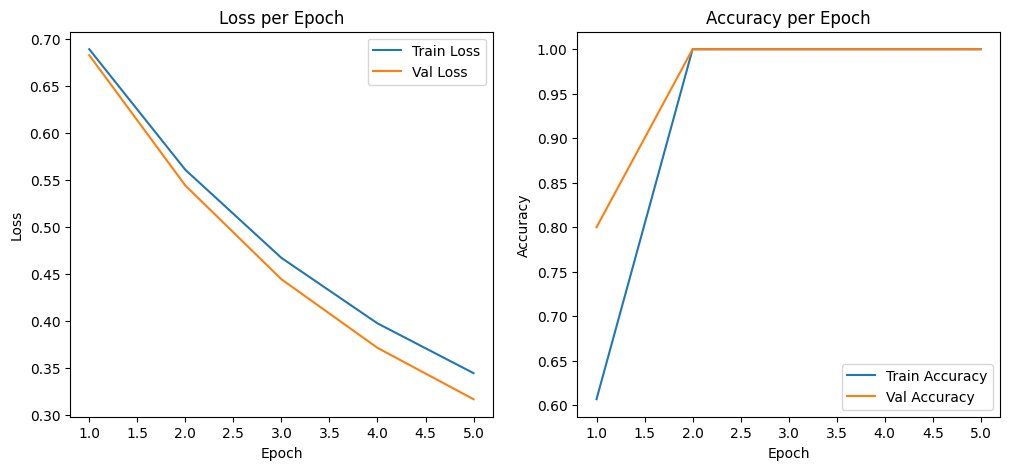

In [8]:
# === Plot grafik ===
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_loss_history, label="Train Loss")
plt.plot(range(1, epochs+1), val_loss_history, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_acc_history, label="Train Accuracy")
plt.plot(range(1, epochs+1), val_acc_history, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch")
plt.legend()

plt.show()